In [1]:
push!(LOAD_PATH, "..")
using ASE
# using MatSciPy
using PyPlot
using PyCall
import TightBinding

9

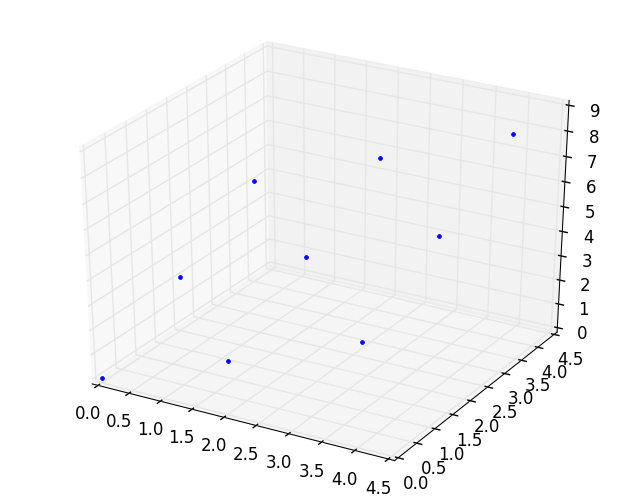

In [2]:
at = bulk("Al") #; cubic=true)
at = repeat(at, (3, 3, 1))
X = positions(at)
# set_pbc!(at, [false, false, false])
plot3D(X[1,:][:], X[2,:][:], X[3,:][:], "b.")
print(length(at))

In [4]:
reload("Potentials")
reload("tbtoymodel")
reload("TightBinding")
reload("MatSciPy")
tbm = TightBinding.ToyTB.ToyTBModel(r0=2.5, rcut=6.0)
E = TightBinding.potential_energy(at, tbm)
println("E = ", E)
frc = TightBinding.forces(at, tbm)
println("|f|∞ = ", norm(frc[:], Inf))

E = -

15.758671486710961
|f|∞ = 6.869504964868156e-16


In [7]:
set_pbc!(at, [false, false, false])

reload("TightBinding")
tbm = TightBinding.ToyTB.ToyTBModel(r0=2.5, rcut=6.0)
E = TightBinding.potential_energy(at, tbm)
println("E = ", E)
frc = TightBinding.forces(at, tbm)
println("|f|∞ = ", norm(frc[:], Inf))

E = -

2.2402263145143673
|f|∞ = 0.14601367064044007


In [73]:
reload("Potentials")
reload("TightBinding")
reload("tbtoymodel")

set_pbc!(at, [false, false, false])
#set_pbc!(at, [true, true, true])

tbm = TightBinding.ToyTB.ToyTBModel(r0=2.5, rcut=8.0)
X = positions(at)
f = TightBinding.potential_energy(at, tbm)
df = TightBinding.forces(at, tbm)[:]
    println("-----------------------------")
    println("  p | error ")
    println("----|------------------------")
    for p = 2:12
        h = 0.1^p
        dfh = zeros(length(df))
        for n = 1:length(df)
            X[n] += h
            set_positions!(at, X)
            dfh[n] = (TightBinding.potential_energy(at, tbm) - f) / h
            X[n] -= h
        end
    #@printf(" %2d | %1.7e \n", p, norm(df - dfh, Inf))
    @printf(" %2d | %1.7e \n", p, norm(dfh + df, Inf))
    end
println("-----------------------------")


LoadError: LoadError: UndefVarError: dH_nn_0 not defined
while loading In[73], in expression starting on line 11

In [75]:
# TEST the NRL-TB hamiltonian constructor
import NRLTB
a = rand(3)*6

f = NRLTB.mat_local(norm(a), a, NRLTB.Al_spd, "H")
df = NRLTB.d_mat_local(norm(a), a, NRLTB.Al_spd, "dH")
println("-----------------------------")
println("  p | error ")
println("----|------------------------")
for p = 2:12
    h = 0.1^p
    dfh = zeros(size(df))
    for n = 1:3
        a[n] += h
        fh = NRLTB.mat_local(norm(a), a, NRLTB.Al_spd, "H")
        dfh[n,:] = (fh - f) / h
        a[n] -= h
    end
    err = reshape(dfh - df, 3*81)
    @printf(" %2d | %1.7e \n", p, norm(err,Inf))
end
println("-----------------------------")

-----------------------------
  p | error 
----|------------------------
  2 | 5.8933950e-05 
  3 | 5.9076327e-06 
  4 | 5.9090552e-07 
  5 | 5.9092714e-08 
  6 | 5.9145055e-09 
  7 | 6.1926205e-10 
  8 | 4.0451333e-09 
  9 | 3.2477369e-08 
 10 | 3.0622082e-07 
 11 | 2.8936173e-06 
 12 | 3.8897222e-05 
-----------------------------


In [16]:
# TEST NRL-TB for Aluminum FCC

reload("SparseTools")
reload("Potentials")
reload("TightBinding")
reload("NRLTB")    
BOHR = 0.52917721092 

set_pbc!(at, [false, false, false])
tbm = NRLTB.NRLTBModel(elem = NRLTB.Al_spd)

X = positions(at)
f = TightBinding.potential_energy(at, tbm)
df = TightBinding.forces(at, tbm)[:] / BOHR
    println("-----------------------------")
    println("  p | error ")
    println("----|------------------------")
for p = 2:12
    h = 0.1^p 
    dfh = zeros(length(df))
    for n = 1:length(df)
        X[n] += h
        set_positions!(at, X)
        dfh[n] = (TightBinding.potential_energy(at, tbm) - f) / h
        X[n] -= h
    end
    @printf(" %2d | %1.7e \n", p, norm(dfh + df, Inf))
end
println("-----------------------------")

-----------------------------
  p | error 
----|------------------------
  2 | 8.2756222e-04 
  3 | 8.2756841e-05 
  4 | 8.2756912e-06 
  5 | 8.2778222e-07 
  6 | 8.5265062e-08 
  7 | 7.1054207e-08 
  8 | 6.5753858e-07 
  9 | 5.8619567e-06 
 10 | 5.5599948e-05 
 11 | 5.6874019e-04 
 12 | 5.7399418e-03 
-----------------------------


In [17]:
# TEST NRL-TB for Aluminum FCC
# WITH PERIODIC BOUNDARY CONDITION ON THIRD DIMENSION
# TAKE nkpoints = (0,0,4)

reload("SparseTools")
reload("Potentials")
reload("TightBinding")
reload("NRLTB")    
BOHR = 0.52917721092 

set_pbc!(at, [false, false, true])
tbm = NRLTB.NRLTBModel(elem = NRLTB.Al_spd)
tbm.nkpoints = (0,0,4)

X = positions(at)
f = TightBinding.potential_energy(at, tbm)
df = TightBinding.forces(at, tbm)[:] / BOHR
    println("-----------------------------")
    println("  p | error ")
    println("----|------------------------")
for p = 2:12
    h = 0.1^p 
    dfh = zeros(length(df))
    for n = 1:length(df)
        X[n] += h
        set_positions!(at, X)
        dfh[n] = (TightBinding.potential_energy(at, tbm) - f) / h
        X[n] -= h
    end
    @printf(" %2d | %1.7e \n", p, norm(dfh + df, Inf))
end
println("-----------------------------")

LoadError: LoadError: MethodError: `convert` has no method matching convert(::Type{SparseTools.SparseTriplet{T}}, ::Array{Int32,1}, ::Array{Int32,1}, ::Array{Complex{Float32},1}, ::Int64)
This may have arisen from a call to the constructor SparseTools.SparseTriplet{T}(...),
since type constructors fall back to convert methods.
Closest candidates are:
  SparseTools.SparseTriplet{T}(::Array{Int32,1}, ::Array{Int32,1}, ::Array{T,1}, !Matched::Int32)
  SparseTools.SparseTriplet(::Any)
  SparseTools.SparseTriplet(::Any, !Matched::DataType)
  ...
while loading In[17], in expression starting on line 16